In [5]:
import numpy as np # linear algebra
import pandas as pd # data  processing, I/O
import matplotlib.pyplot as plt # graph
from builtins import list # call the list
import matplotlib
matplotlib.style.use('ggplot') # get output in GGPLOT way
import datetime # date time information
%matplotlib inline

In [6]:
# load the data
Cab_df= pd.read_csv("Cab_Rides.csv")

In [7]:
Cab_df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [8]:
Cab_df.shape

(1155, 7)

In [9]:
Cab_df.head(7)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting


In [10]:
Cab_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [11]:
# fix data type of data columns
def convert_time(column_name):
    y = []
    for x in Cab_df[column_name]:
        y.append(datetime.datetime.strptime(x,"%m/%d/%Y %H:%M"))
        
    Cab_df[column_name] = y


In [12]:
column_date = Cab_df[['START_DATE*','END_DATE*']]
for x in column_date:
    convert_time(x)

In [13]:
Cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [20]:
Cab_df.head(7)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting


In [14]:
Cab_df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [15]:
Cab_df.describe()

,MILES*
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [29]:
missing = Cab_df.isnull().sum()

In [30]:
missing

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [18]:
Cab_df.mode()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-06-28 23:34:00,2016-06-28 23:59:00,Business,Cary,Cary,9.9,Meeting


In [19]:
Cab_df["PURPOSE*"].mode()

0    Meeting
dtype: object

In [28]:
# fill missing value by mode
Cab_df["PURPOSE*"].fillna("Meeting",inplace = True)

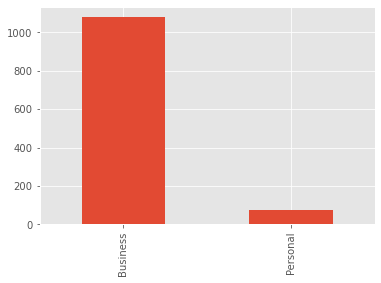

In [35]:
# plot number of trip at each category
Cab_df["CATEGORY*"].value_counts().plot(kind = "bar");

In [36]:
#Number of trips per month
count = 0
month = []
while count <len(Cab_df):
    month.append(Cab_df['START_DATE*'][count].month)
    count = count +1
Cab_df['Month'] = month

In [42]:
Cab_df.tail(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Month
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,12
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,12
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,12
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,12
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,12


In [46]:
Cab_df["Month"].value_counts()

12    146
8     133
11    122
2     115
3     113
7     112
6     108
10    106
1      61
4      54
5      49
9      36
Name: Month, dtype: int64

In [51]:
# calculate duration of each trip in minutes
minutes = []
Cab_df["Duration_minutes"] = Cab_df["END_DATE*"]- Cab_df["START_DATE*"]
Cab_df["Duration_minutes"]
for x in Cab_df["Duration_minutes"] :
    minutes.append(x.seconds/60)

Cab_df["Duration_minutes"] = minutes

In [52]:
Cab_df.tail(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Month,Duration_minutes
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,12,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,12,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,12,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,12,18.0
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,12,103.0


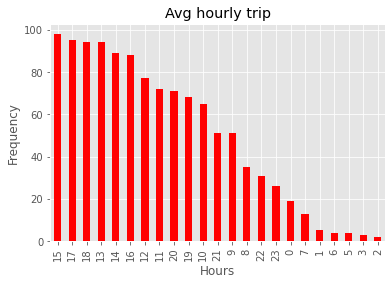

In [61]:
# Avg hourly trip

hours = Cab_df["START_DATE*"].dt.hour.value_counts()
hours.plot(kind = 'bar', color ="red")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Avg hourly trip");
#plt.show()

In [63]:
purpose_time = Cab_df["PURPOSE*"].value_counts()

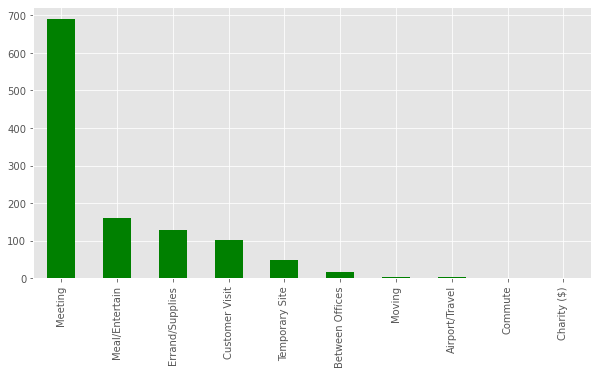

In [65]:
purpose_time.plot(kind = "bar", color = "green", figsize =(10,5));

In [75]:
# calculate trip speed
Cab_df["Duration_hours"] = Cab_df["Duration_minutes"]/60
Cab_df["Speed_KM"] = Cab_df['MILES*']/Cab_df["Duration_hours"]

In [73]:
Cab_df["Speed_KM"].head()

0    51.001000
1    25.001000
2    22.154846
3    20.143857
4    57.045776
Name: Speed_KM, dtype: float64